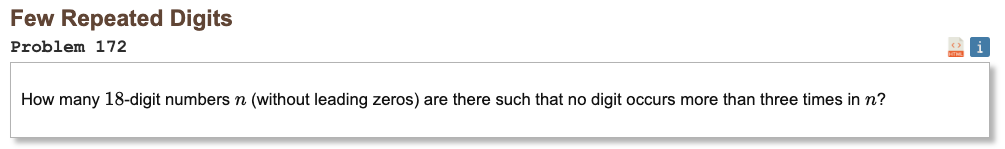

## Initial approach

* count 18 digit numbers with no digit used more than three times
* allow zero inside but first digit cannot be zero
* count all sequences with length 18 and each digit used at most three, then subtract those starting with zero
* use generating functions with caps, multiply integer polynomials to get coefficients
* total count is 18 factorial times coeff of x^18 in ((1+x+x^2/2+x^3/6)^10), scaled correctly
* leading zero count is 17 factorial times coeff of x^17 in ((1+x+x^2/2) for zero) times ((1+x+x^2/2+x^3/6)^9), scaled correctly
* answer equals total minus leading zero cases, computed with integer DP on coefficients

In [1]:
def conv(a, b, maxdeg):
    res = [0] * (maxdeg + 1)
    for i, ai in enumerate(a):
        if ai == 0:
            continue
        for j, bj in enumerate(b):
            d = i + j
            if d <= maxdeg:
                res[d] += ai * bj
    return res

def factorial(n):
    r = 1
    for i in range(2, n + 1):
        r *= i
    return r

def solve():
    P = [6, 6, 3, 1]
    Q = [2, 2, 1]
    poly_T = [1]
    for _ in range(10):
        poly_T = conv(poly_T, P, 18)
    coeff_T = poly_T[18]
    T = factorial(18) * coeff_T // (6 ** 10)
    poly_L = [1]
    poly_L = conv(poly_L, Q, 17)
    for _ in range(9):
        poly_L = conv(poly_L, P, 17)
    coeff_L = poly_L[17]
    L = factorial(17) * coeff_L // (2 * (6 ** 9))
    return T - L

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 227485267000992000
CPU times: user 1.01 ms, sys: 194 μs, total: 1.2 ms
Wall time: 1.21 ms
